# **Problem Statement**


---

#### **Business Context**  
Understanding customer personality and behavior is pivotal for businesses to enhance customer satisfaction and increase revenue. Segmentation based on a customer's personality, demographics, and purchasing behavior allows companies to create tailored marketing campaigns, improve customer retention, and optimize product offerings.  

A leading retail company with a rapidly growing customer base seeks to gain deeper insights into their customers' profiles. The company recognizes that understanding customer personalities, lifestyles, and purchasing habits can unlock significant opportunities for personalizing marketing strategies and creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying in the retail space, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Let's start coding!**

## **Importing necessary libraries**

In [1]:


# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **Loading the data**

In [2]:
# uncomment and run the following line if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading data into a pandas dataframe
data = pd.read_csv("/content/marketing_campaign.csv", sep="\t")

In [4]:
# Sample the first 5 data to see how the table display the information
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## **Data Overview**

### **Feature Engineering**


We also want to see how customer age relate to the response


In [5]:
from datetime import datetime

# Calculate the age of each customer
current_year = datetime.now().year
data['Age'] = current_year - data['Year_Birth']

# Reorder columns to place 'Age' next to 'Year_Birth' for better appealing visual
cols = list(data.columns)
age_index = cols.index('Age')
year_birth_index = cols.index('Year_Birth')
new_cols = cols[:year_birth_index] + [cols[age_index]] + cols[year_birth_index:age_index] + cols[age_index+1:]

data = data[new_cols]
data.head()

,ID,Age,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,68,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,71,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,60,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,41,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,44,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


The spending information (**Mnt...**) can be merged into a variable name Spending

In [6]:
# Calculate total spending
data['Spending'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

# Get a list of column names
cols = list(data.columns)
mnt_gold_index = cols.index('MntGoldProds')
spending_index = cols.index('Spending')
new_cols = cols[:mnt_gold_index+1] + [cols[spending_index]] + cols[mnt_gold_index+1:spending_index] + cols[spending_index+1:]

# Reorder the DataFrame columns
data = data[new_cols]
data.head()

,ID,Age,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Spending,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,68,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,1617,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,71,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,27,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,60,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,776,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,41,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,53,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,44,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,422,5,5,3,6,5,0,0,0,0,0,0,3,11,0


The number of purchased items (...Purchases) can be merged into a variable name NumPurchase



In [7]:
# Calculate total number of purchases
data['NumPurchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']

# Get a list of column names
cols = list(data.columns)

# Find the indices of 'NumStorePurchases' and 'NumPurchases'
num_store_purchases_index = cols.index('NumStorePurchases')
num_purchases_index = cols.index('NumPurchases')

# Create a new list of columns with 'NumPurchases' placed after 'NumStorePurchases'
new_cols = cols[:num_store_purchases_index + 1] + [cols[num_purchases_index]] + cols[num_store_purchases_index + 1:num_purchases_index] + cols[num_purchases_index + 1:]

# Reorder the DataFrame columns
data = data[new_cols]
data.head()

,ID,Age,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Spending,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,68,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,1617,3,8,10,4,22,7,0,0,0,0,0,0,3,11,1
1,2174,71,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,27,2,1,1,2,4,5,0,0,0,0,0,0,3,11,0
2,4141,60,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,776,1,8,2,10,20,4,0,0,0,0,0,0,3,11,0
3,6182,41,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,53,2,2,0,4,6,6,0,0,0,0,0,0,3,11,0
4,5324,44,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,422,5,5,3,6,14,5,0,0,0,0,0,0,3,11,0


Can merge Kidhome and Teenhome


In [8]:
# Calculate the total number of children (kids and teens)
data['NumChild'] = data['Kidhome'] + data['Teenhome']

# Get a list of column names
cols = list(data.columns)

# Find the indices of 'Teenhome' and 'NumChild'
teenhome_index = cols.index('Teenhome')
numchild_index = cols.index('NumChild')

# Create a new list of columns with 'NumChild' placed after 'Teenhome'
new_cols = cols[:teenhome_index+1] + [cols[numchild_index]] + cols[teenhome_index+1:numchild_index] + cols[numchild_index+1:]

# Reorder the DataFrame columns
data = data[new_cols]
data.head()

,ID,Age,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,NumChild,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Spending,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,68,1957,Graduation,Single,58138.0,0,0,0,04-09-2012,58,635,88,546,172,88,88,1617,3,8,10,4,22,7,0,0,0,0,0,0,3,11,1
1,2174,71,1954,Graduation,Single,46344.0,1,1,2,08-03-2014,38,11,1,6,2,1,6,27,2,1,1,2,4,5,0,0,0,0,0,0,3,11,0
2,4141,60,1965,Graduation,Together,71613.0,0,0,0,21-08-2013,26,426,49,127,111,21,42,776,1,8,2,10,20,4,0,0,0,0,0,0,3,11,0
3,6182,41,1984,Graduation,Together,26646.0,1,0,1,10-02-2014,26,11,4,20,10,3,5,53,2,2,0,4,6,6,0,0,0,0,0,0,3,11,0
4,5324,44,1981,PhD,Married,58293.0,1,0,1,19-01-2014,94,173,43,118,46,27,15,422,5,5,3,6,14,5,0,0,0,0,0,0,3,11,0


In [9]:
# Check the number of data points.
data.shape

(2240, 33)

#### **Question 1**: What are the data types of all the columns?

In [10]:
# Using info() to check the data type, and the number of non-null data point for each row.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Age                  2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   NumChild             2240 non-null   int64  
 9   Dt_Customer          2240 non-null   object 
 10  Recency              2240 non-null   int64  
 11  MntWines             2240 non-null   int64  
 12  MntFruits            2240 non-null   int64  
 13  MntMeatProducts      2240 non-null   int64  
 14  MntFishProducts      2240 non-null   int64  
 15  MntSweetProducts     2240 non-null   i

##### **Observations:**
1. It can be witnessed that there is 1 float column (**Income**), 3 object columns (**Education**, **Marital Status**, **Dt_Customer**), and 28 integer columns.
2. The three object datatype columns (**Education**, **Marital Status**, **Dt_Customer**) represent categorical variable, while **Income** and all **Mnt...** prefix variables represent monetary value (**Mnt...** variables might be rounded to the nearest integer). **AcceptedCmp...** variables and **Response** are binary variables, but they are initialised as 64bit variables.

#### **Question 2:** Check the statistical summary of the data. What is the average household income?

In [11]:
# Using describe() function to show statistical summary. Transpose and round to 3 decimal places for better display
data.drop(['ID'], axis=1).describe().T.round(3) #Drop ID column since it does not contribute to the statistical info.

,count,mean,std,min,25%,50%,75%,max
Age,2240.0,56.194,11.984,29.0,48.00,55.0,66.00,132.0
Year_Birth,2240.0,1968.806,11.984,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251,25173.077,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444,0.538,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506,0.545,0.0,0.00,0.0,1.00,2.0
NumChild,2240.0,0.950,0.752,0.0,0.00,1.0,1.00,3.0
Recency,2240.0,49.109,28.962,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.936,336.597,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302,39.773,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950,225.715,0.0,16.00,67.0,232.00,1725.0


##### **Observations:** The average household income is **52247.251$**.


#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [12]:
# count the number of null for each attribute
data.isnull().sum()

,0
ID,0
Age,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
NumChild,0
Dt_Customer,0


##### **Observations:**
Only income has NaN values (24 missing value). We need to further examine the data in detail to understant why **Income** has these values?

In [13]:
# show all columns has missing data
data[data['Income'].isnull()]

,ID,Age,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,NumChild,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Spending,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,42,1983,Graduation,Married,NaN,1,0,1,15-11-2013,11,5,5,6,0,2,1,19,1,1,0,2,3,7,0,0,0,0,0,0,3,11,0
27,5255,39,1986,Graduation,Single,NaN,1,0,1,20-02-2013,19,5,1,3,3,263,362,637,0,27,0,0,27,1,0,0,0,0,0,0,3,11,0
43,7281,66,1959,PhD,Single,NaN,0,0,0,05-11-2013,80,81,11,50,3,2,39,186,1,1,3,4,8,2,0,0,0,0,0,0,3,11,0
48,7244,74,1951,Graduation,Single,NaN,2,1,3,01-01-2014,96,48,5,48,6,10,7,124,3,2,1,4,7,6,0,0,0,0,0,0,3,11,0
58,8557,43,1982,Graduation,Single,NaN,1,0,1,17-06-2013,57,11,3,22,2,2,6,46,2,2,0,3,5,6,0,0,0,0,0,0,3,11,0
71,10629,52,1973,2n Cycle,Married,NaN,1,0,1,14-09-2012,25,25,3,43,17,4,17,109,3,3,0,3,6,8,0,0,0,0,0,0,3,11,0
90,8996,68,1957,PhD,Married,NaN,2,1,3,19-11-2012,4,230,42,192,49,37,53,603,12,7,2,8,17,9,0,0,0,0,0,0,3,11,0
91,9235,68,1957,Graduation,Single,NaN,1,1,2,27-05-2014,45,7,0,8,2,0,1,18,1,1,0,2,3,7,0,0,0,0,0,0,3,11,0
92,5798,52,1973,Master,Together,NaN,0,0,0,23-11-2013,87,445,37,359,98,28,18,985,1,2,4,8,14,1,0,0,0,0,0,0,3,11,0
128,8268,64,1961,PhD,Married,NaN,0,1,1,11-07-2013,23,352,0,27,10,0,15,404,3,6,1,7,14,6,0,0,0,0,0,0,3,11,0


The minimum income value is 1750, which means the data set excluding rows with Null values does not includes those without income. A further observation is individuals with NaN income are primarily students. This indicates that NaN in the **Income** column likely represents individuals without an income rather than missing or insignificant values.


In [14]:
# Since the data might be useful if we want to target students in the future, we can change NaN to 0
data.fillna(0, inplace=True)

In [15]:
# Double check to make sure there is no missing values
data.isnull().sum()

,0
ID,0
Age,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
NumChild,0
Dt_Customer,0


#### **Question 4**: Are there any duplicates in the data?

In [16]:
# Check number of duplicates
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


##### **Observations:**
There is no duplicate in the data

## **Exploratory Data Analysis**

For Data Analysis, we only care about numerical variables. Thus, we drop the non-numeric,

In [17]:
drop_cols = ['ID','Year_Birth','Dt_Customer','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Z_CostContact', 'Z_Revenue', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome']
data.drop(columns=drop_cols, inplace=True)

### Univariate Analysis

#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)

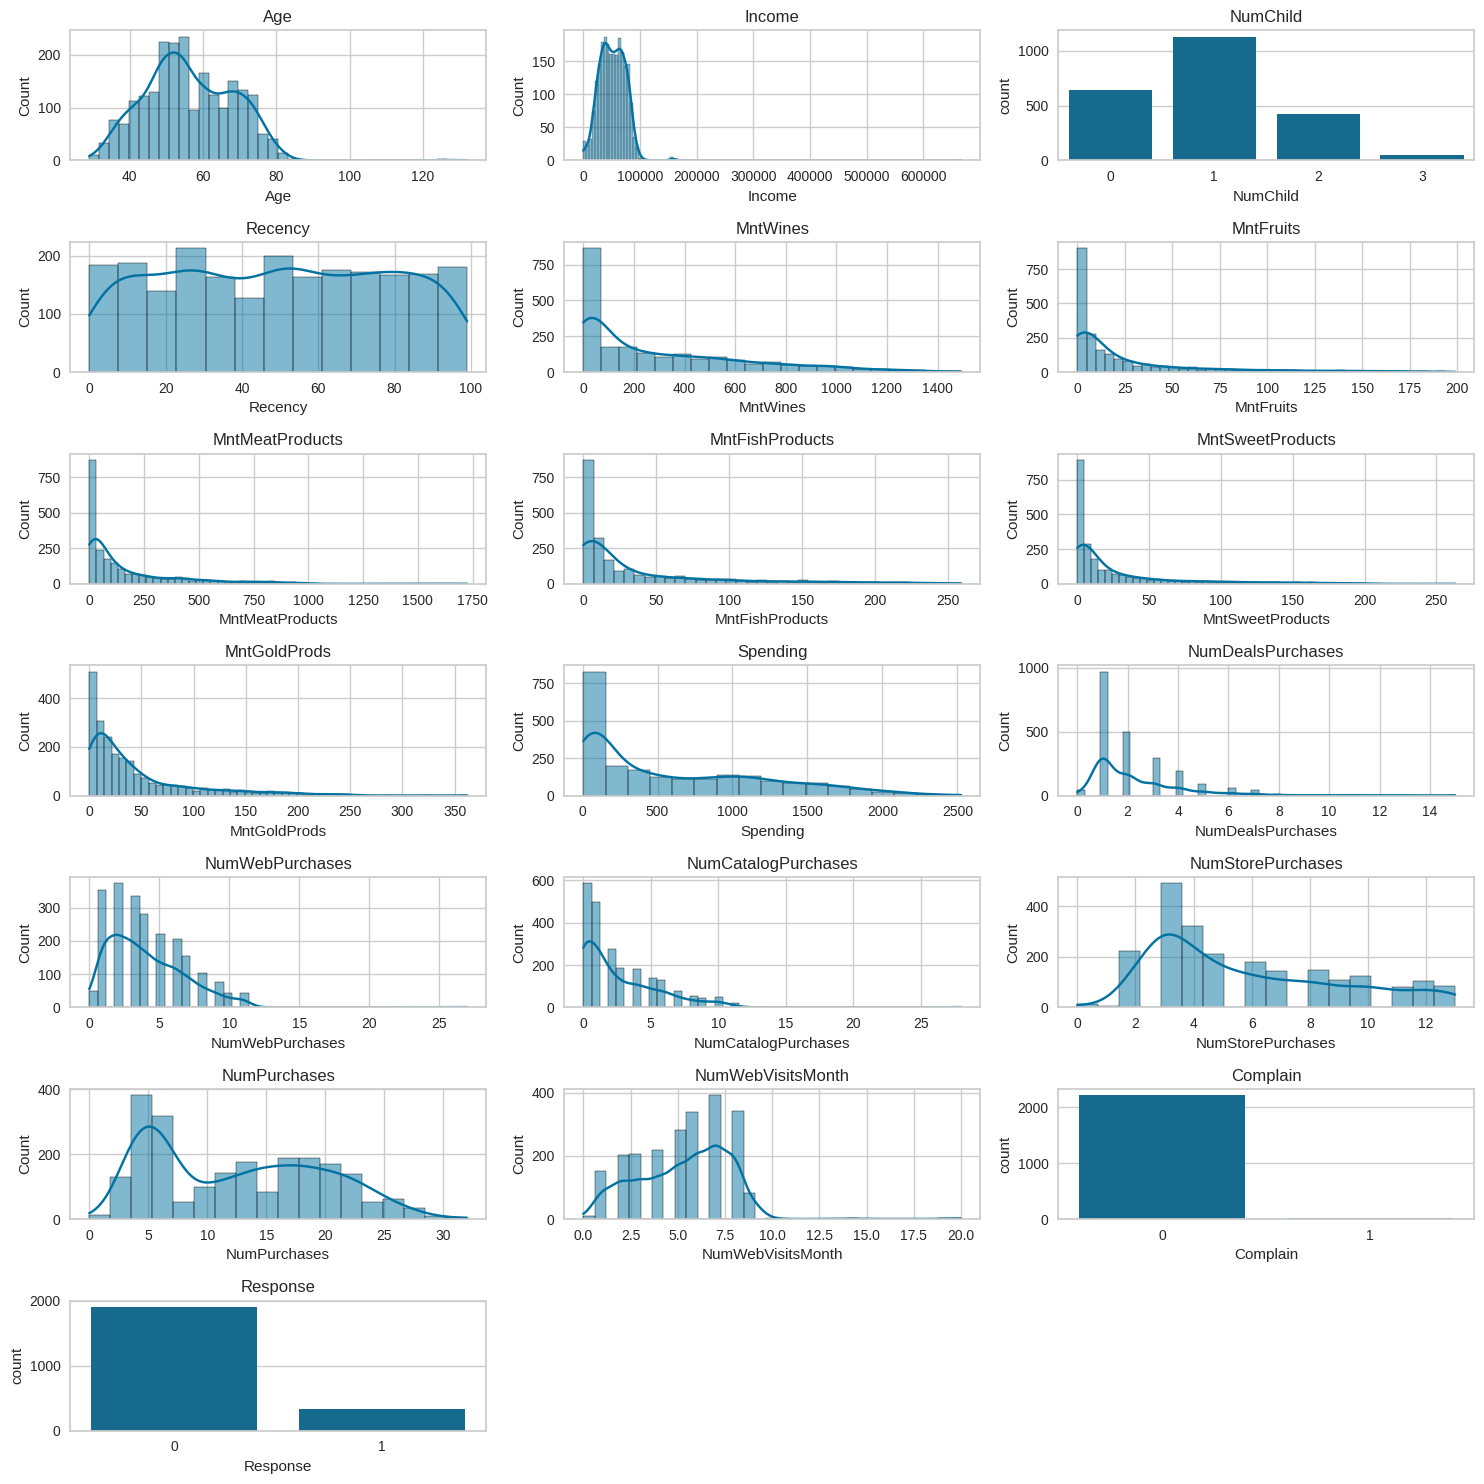

In [18]:
plt.figure(figsize=(15, 15))
num_cols = 3
num_rows = 7

for i, col in enumerate(data.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    # if the variable is binary or too few categories, use bar chart to better display
    # (if using histogram, there will be value in the middle, which affect the view)
    if data[col].nunique() <= 4:
        sns.countplot(x=data[col])
    else: # histogram for non-binary attributes
        sns.histplot(data[col], kde=True)

    plt.title(col)

plt.tight_layout()
plt.show()

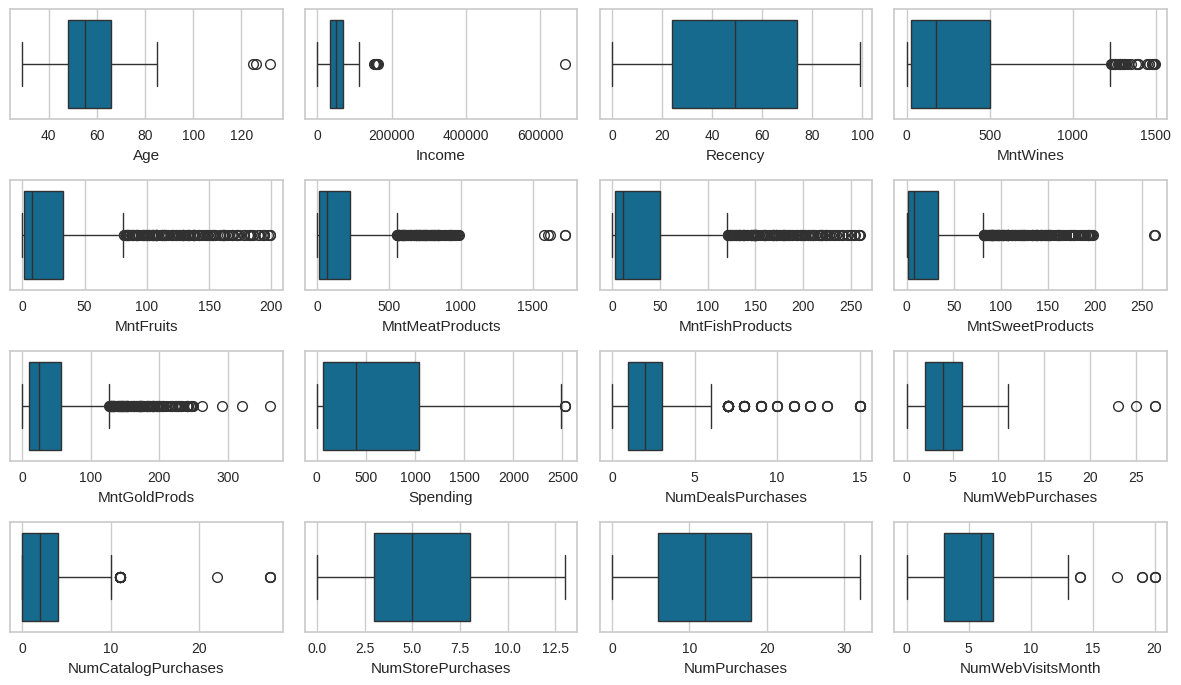

In [19]:
# Boxplot for all variables except 'ID', constant variables, and binary variable
plt.figure(figsize=(12, 10))

# plotting the boxplot for each numerical feature
for i, feature in enumerate(data.columns.drop(['Complain', 'Response', 'NumChild'])):    # iterating through each column
    plt.subplot(6, 4, i+1)                     # assign a subplot in the main plot
    sns.boxplot(data=data, x=feature)           # plot the boxplot, using the 'feature' for the x-axis

plt.tight_layout()   # to add spacing between plots
plt.show()

##### **Observations:**

- Age - The distribution is slightly right-skewed, with most individuals between 40 and 70 years old.
- Income - Highly right-skewed, with a majority earning below 100,000 but some extreme outliers.
- NumChild - Most individuals have either one or two children, with fewer having none or three.
- Recency - Appears to be uniformly distributed, indicating no strong bias in recent purchases.
- Spending Categories (MntWines, MntMeatProducts, etc.) - All show right-skewed distributions, meaning most people spend small amounts, with a few high spenders.
- NumDealsPurchases - Most customers use very few deals, with some using more than 10.
- Purchase Channels (NumWebPurchases, NumCatalogPurchases, NumStorePurchases) - Web and catalog purchases are right-skewed, while store purchases have a more balanced distribution.
- NumPurchases - A right-skewed distribution, with most customers making fewer than 10 purchases.
- NumWebVisitsMonth - Somewhat normally distributed, peaking around 7-10 visits per month.
- Response (Campaign Response) - Most people did not respond to the campaign, indicating low engagement.
- Complain - Very few customers have filed complaints.


### Bivariate Analysis

#### **Question 6:** Perform multivariate analysis to explore the relationsips between the variables.

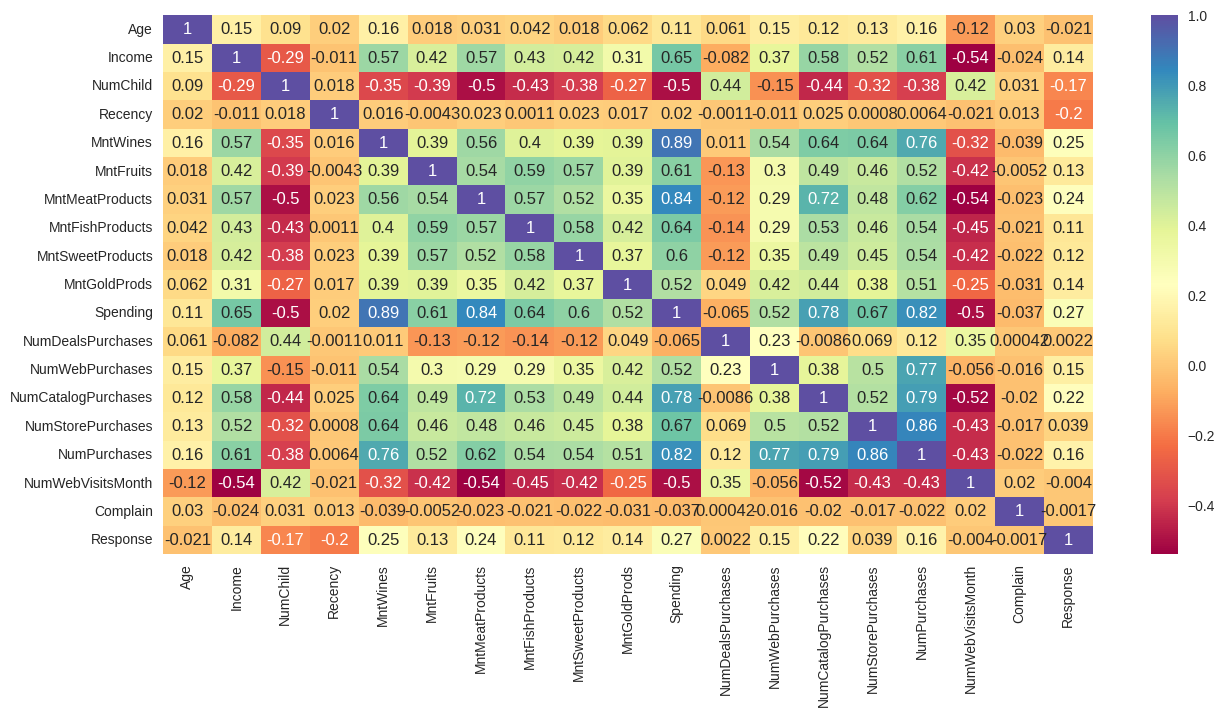

In [20]:
plt.figure(figsize=(15, 7))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="Spectral")
plt.show()

Highly Correlated Features:  {'Spending', 'Income', 'NumCatalogPurchases', 'NumStorePurchases', 'MntMeatProducts', 'NumPurchases', 'MntWines', 'NumWebPurchases'}


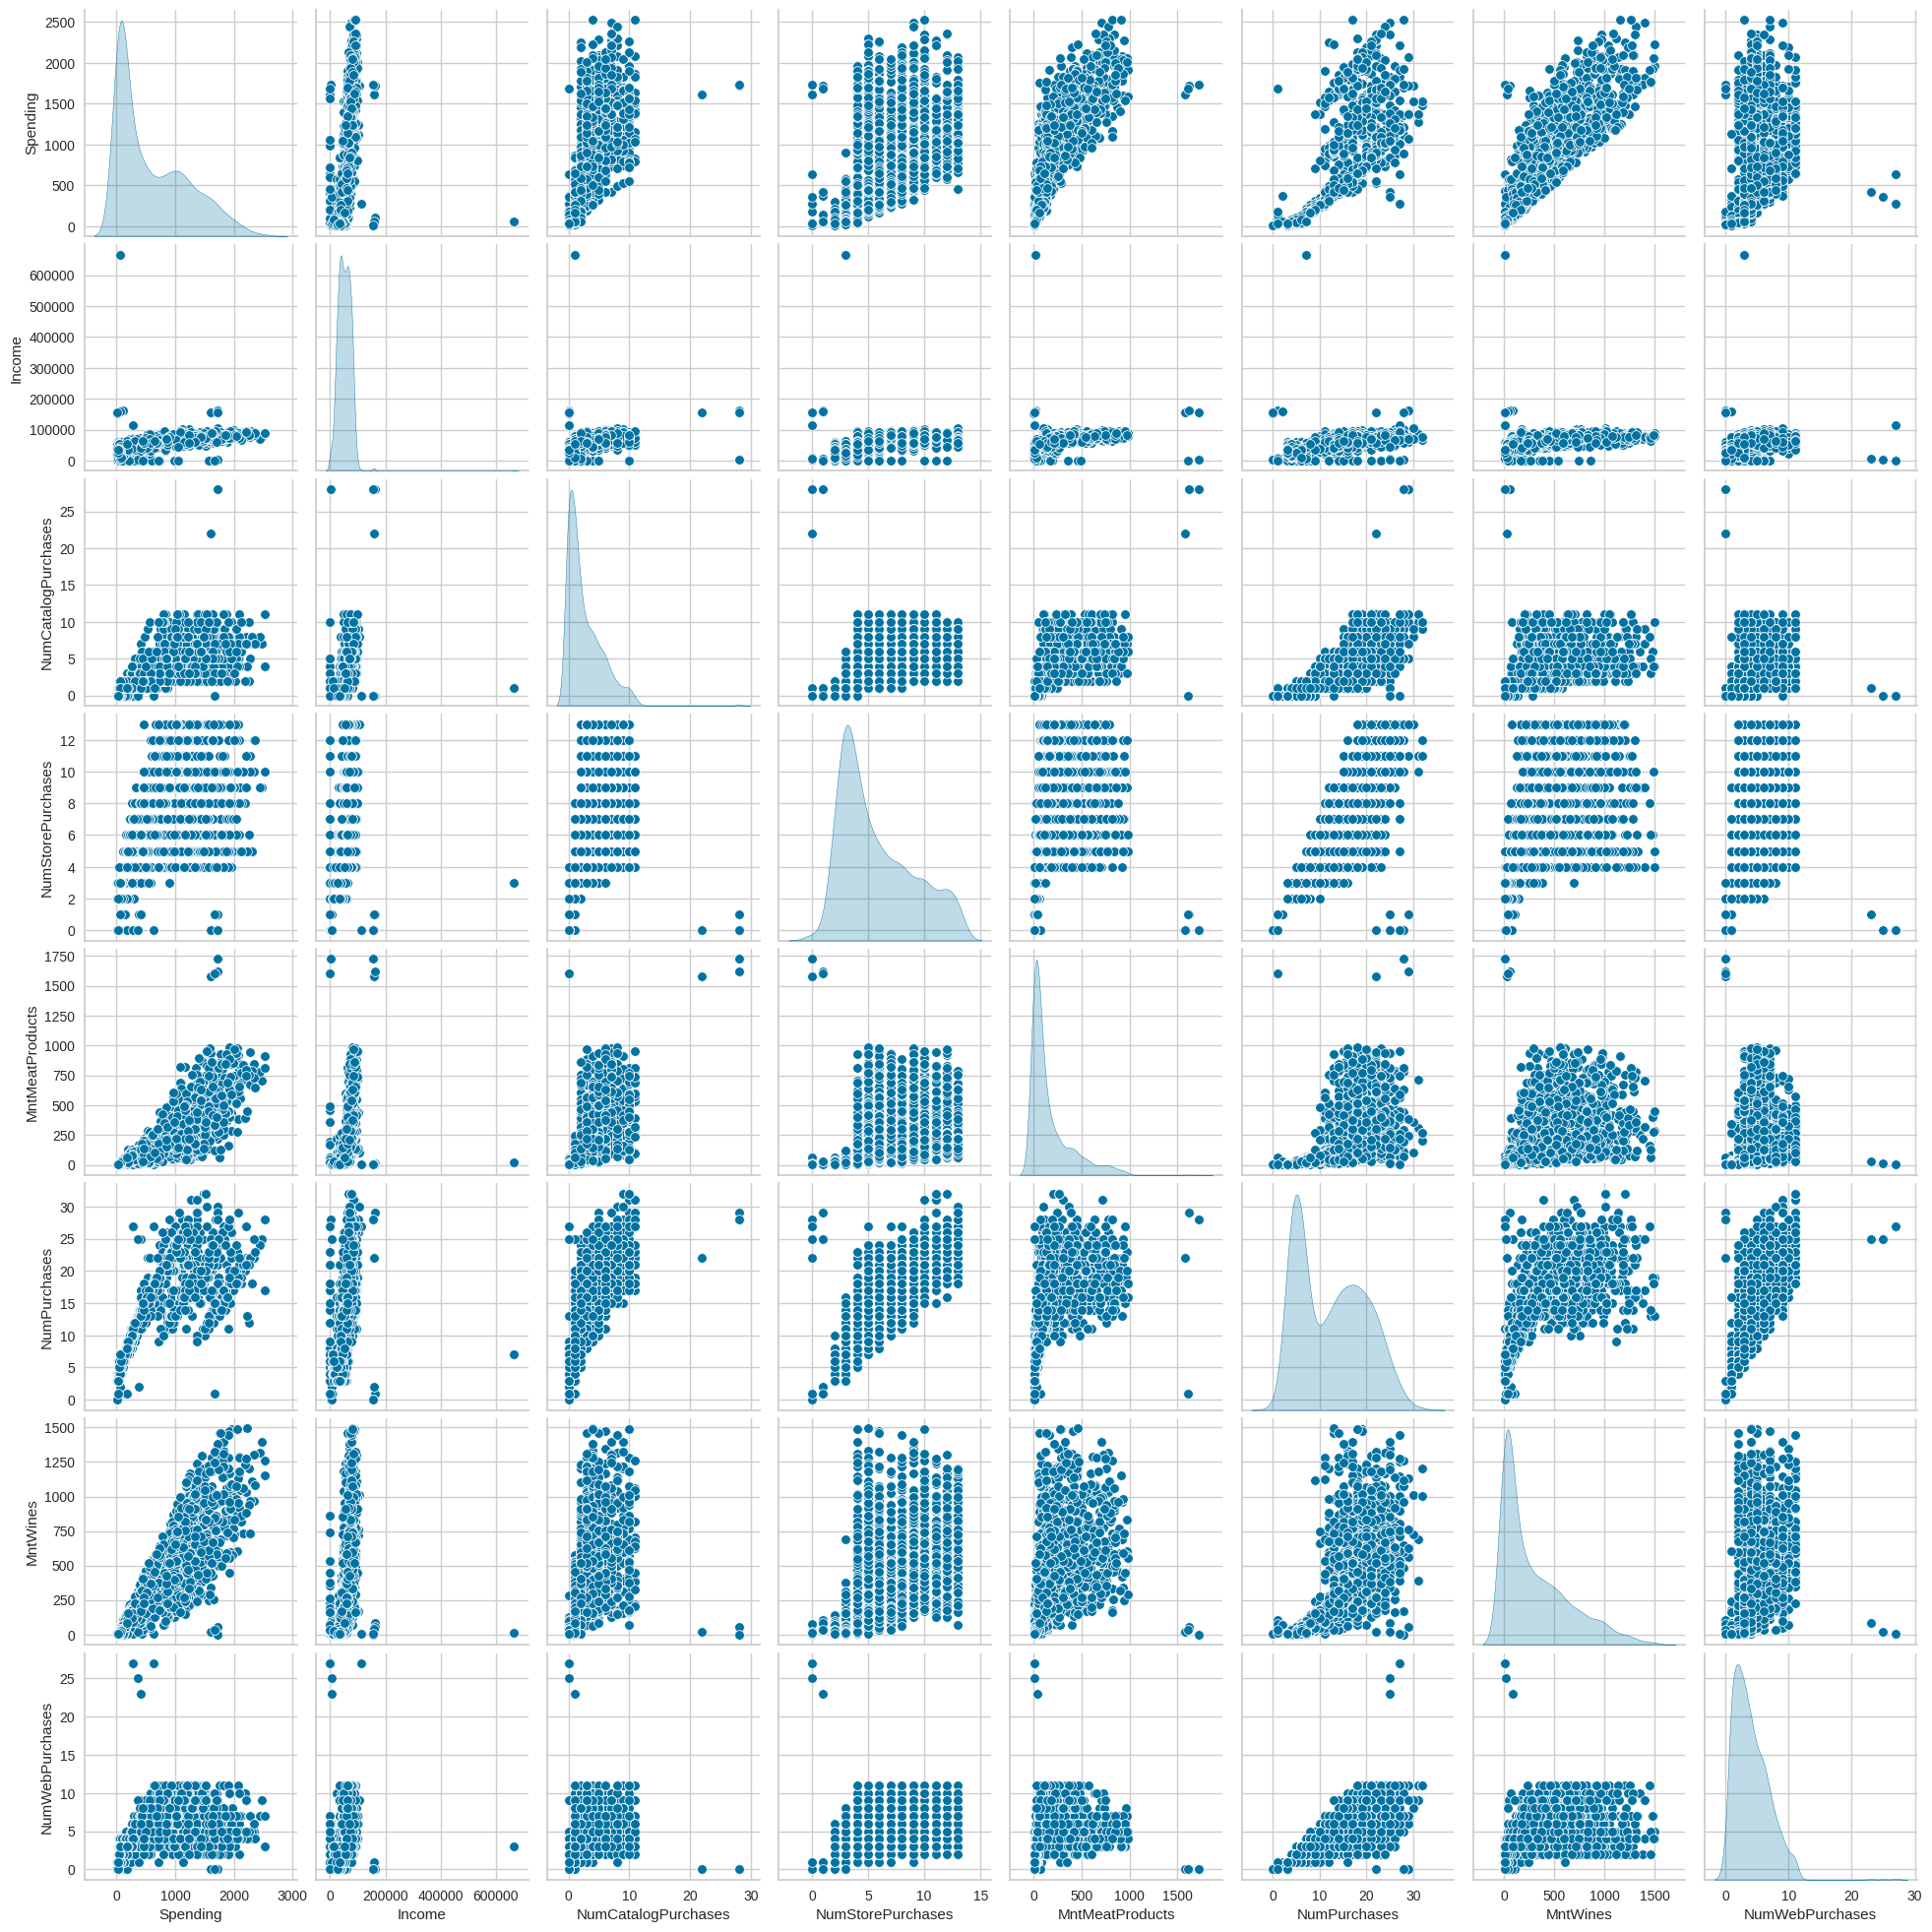

In [21]:
# Create a sns.pairplot using diag_kind='kde', but only include the features that have a correlation greater than 0.5 with at least one other feature.
# Find features with correlation greater than 0.65
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.65:
            high_corr_features.add(corr_matrix.columns[i])
            high_corr_features.add(corr_matrix.columns[j])  # Move to the next column once a high correlation is found
print('Highly Correlated Features: ', high_corr_features)
selected_features = list(set(high_corr_features))
selected_data = data[selected_features]

sns.pairplot(selected_data, diag_kind='kde')
plt.show()

##### **Observations:**
**Strong Positive Correlations:**

- Spending vs. MntWines, MntMeatProducts, MntFishProducts, MntGoldProds, and MntSweetProducts - All spending-related variables show strong positive correlations (above 0.6), suggesting that customers who spend more in one category tend to spend more in others.
- NumPurchases vs. NumWebPurchases, NumStorePurchases, NumCatalogPurchases - All purchase channels have strong correlations with total purchases (above 0.7), indicating that customers who purchase more tend to use multiple channels.

**Negative Correlations:**

- NumChild vs. Spending (-0.5) - More children correlate with lower spending, possibly due to budget constraints.
- NumWebVisitsMonth vs. Spending (-0.5) - Higher web visits do not necessarily translate to higher spending, suggesting that frequent website visitors may browse more than they buy.

**Moderate Correlations with Income:**

- Income vs. Spending (0.65) - Higher-income individuals tend to spend more.
Income vs. MntWines, MntMeatProducts, and NumCatalogPurchases (around 0.5 - 0.6) - Suggests that wealthier customers prefer catalog purchases and spend more on specific product categories.
Response to Campaign:

**Weak correlations with other features:**
- The response variable does not show strong correlations with any single factor, though it has a slight positive correlation with spending (0.27), indicating that higher spenders are slightly more likely to respond to marketing campaigns.

## **K-means Clustering**

Before perform K-Means, standardization is a must-do step. Standardization centers the data around zero and scales it by standard deviation, make it easier for clustering.


In [22]:
scaler = StandardScaler() #create a standardization method
subset = data.copy() #copy the dataset
subset_scaled = scaler.fit_transform(subset) #create a standardized dataset

In [23]:
# creating a dataframe of the scaled data
subset_scaled_data = pd.DataFrame(subset_scaled, columns=subset.columns)

We want to examine the shopping behavior of the customers, so we focus on 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'

In [24]:
k_means_data = subset_scaled_data.copy() # This will be used later in cluster profiling
k_means_data = k_means_data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
k_means_data

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,0.349414,1.409304,2.510890,-0.550785,0.693904
1,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463
2,-0.685887,1.409304,-0.226541,1.295237,-0.542647
3,-0.168236,-0.750450,-0.910898,-0.550785,0.281720
4,1.384715,0.329427,0.115638,0.064556,-0.130463
...,...,...,...,...,...
2235,-0.168236,1.769263,0.115638,-0.550785,-0.130463
2236,2.420015,1.409304,-0.226541,-0.243114,0.693904
2237,-0.685887,-0.750450,0.115638,2.218248,0.281720
2238,-0.168236,0.689386,0.799996,1.295237,-0.954831


#### **Question 7** : Select the appropriate number of clusters using the elbow Plot. What do you think is the appropriate number of clusters?

Number of Clusters: 1 	WCSS: 11200.000000000013
Number of Clusters: 2 	WCSS: 7316.20713702728
Number of Clusters: 3 	WCSS: 5558.876831147695
Number of Clusters: 4 	WCSS: 4827.718668106687
Number of Clusters: 5 	WCSS: 4480.857119734444
Number of Clusters: 6 	WCSS: 4114.117789558041
Number of Clusters: 7 	WCSS: 3878.156908347831
Number of Clusters: 8 	WCSS: 3597.1146122069063
Number of Clusters: 9 	WCSS: 3310.5040551617053
Number of Clusters: 10 	WCSS: 3171.835895267494
Number of Clusters: 11 	WCSS: 2969.747503159889


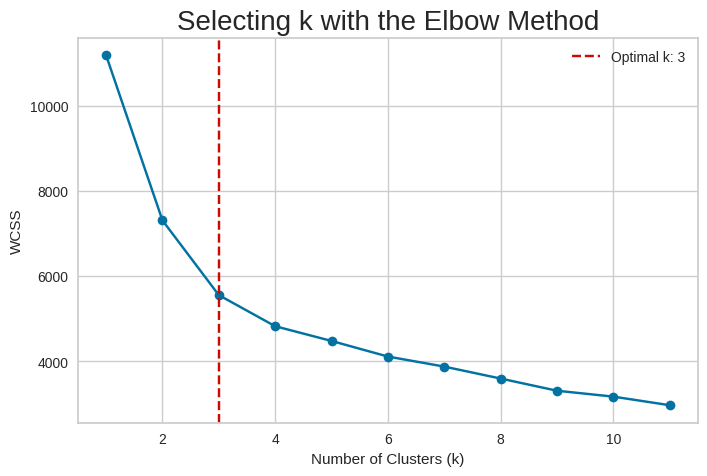

Optimal number of clusters (k): 3


In [25]:
# Initialize variables
max_clusters = 11  # Maximum number of clusters to evaluate
wcss_values = []

# Calculate WCSS for 1 to max_clusters
for k in range(1, max_clusters + 1):
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(k_means_data)
    wcss_values.append(model.inertia_)

    print("Number of Clusters:", k, "\tWCSS:",model.inertia_)

# Automatically find the elbow point using the rate of change
threshold_percent = 15
best_k = 1
for k in range(1, len(wcss_values) - 3):
    # Calculate percentage decreases in the next 3 points
    perc_change_1 = (wcss_values[k - 1] - wcss_values[k]) / wcss_values[k - 1] * 100
    perc_change_2 = (wcss_values[k] - wcss_values[k + 1]) / wcss_values[k] * 100
    perc_change_3 = (wcss_values[k + 1] - wcss_values[k + 2]) / wcss_values[k + 1] * 100
    # Check if the percentage changes of the next 3 points are below the threshold. if the condition satisfy, then select current k
    if perc_change_1 < threshold_percent and perc_change_2 < threshold_percent and perc_change_3 < threshold_percent:
        best_k = k
        break

# Plot the WCSS values and highlight the elbow point
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_clusters + 1), wcss_values, "bx-", marker="o")
plt.axvline(x=best_k, color="r", linestyle="--", label=f"Optimal k: {best_k}")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.legend()
plt.show()

print(f"Optimal number of clusters (k): {best_k}")

##### **Observations:** Optimal number of clusters is 3

#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

For n_clusters = 2, the silhouette score is 0.36686278416900175
For n_clusters = 3, the silhouette score is 0.3809059711494198
For n_clusters = 4, the silhouette score is 0.36948882301278463
For n_clusters = 5, the silhouette score is 0.3166097391370579
For n_clusters = 6, the silhouette score is 0.28027365878434507
For n_clusters = 7, the silhouette score is 0.2697439868513423
For n_clusters = 8, the silhouette score is 0.25482867686372157
For n_clusters = 9, the silhouette score is 0.2551042151439601
For n_clusters = 10, the silhouette score is 0.24293474328748244
For n_clusters = 11, the silhouette score is 0.24676627263619244


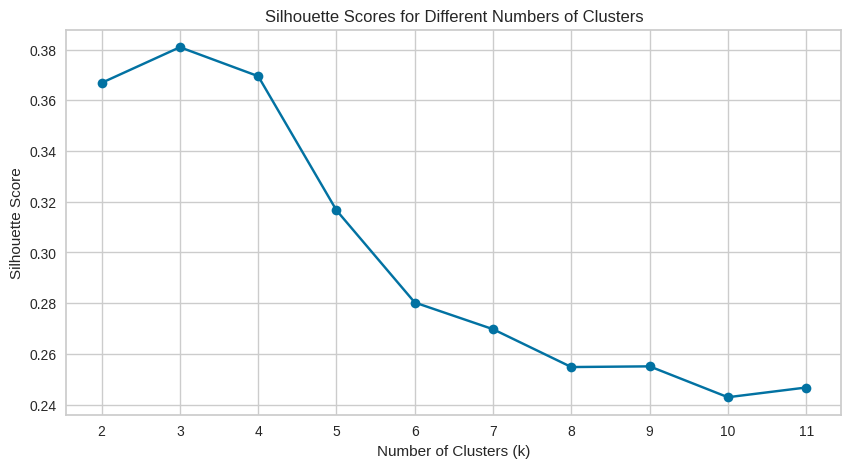

Optimal number of clusters: 3


In [26]:
sil_scores = []
max_clusters = 11
best_k = 2
best_score = -1  # Initialize best score

for n_clusters in range(2, max_clusters + 1):
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict(k_means_data)
    score = silhouette_score(k_means_data, preds)  # Calculate silhouette score
    sil_scores.append(score)

    print(f"For n_clusters = {n_clusters}, the silhouette score is {score}") # print results
    # Update best_k if the score improves
    if score > best_score:
        best_score = score
        best_k = n_clusters

# Plot the silhouette scores for all cluster counts
plt.figure(figsize=(10, 5))
plt.plot(range(2, max_clusters + 1), sil_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xticks(range(2, max_clusters + 1))
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"Optimal number of clusters: {best_k}")

##### **Observations:** k = 3 has the highest Silhouette Score, which indicates that 3 is the best number of cluster.

#### **Question 9**: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?

In [27]:
%%time
kmeans = KMeans(n_clusters=best_k, random_state=0)
kmeans.fit(k_means_data)

CPU times: user 8.16 ms, sys: 4.9 ms, total: 13.1 ms
Wall time: 9.6 ms


KMeans(n_clusters=3, random_state=0)

##### **Observations:**

## **Hierarchical Clustering**

Setup new dataset

In [28]:
hc_data = subset_scaled_data.copy()
hc_data = hc_data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
hc_data

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,0.349414,1.409304,2.510890,-0.550785,0.693904
1,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463
2,-0.685887,1.409304,-0.226541,1.295237,-0.542647
3,-0.168236,-0.750450,-0.910898,-0.550785,0.281720
4,1.384715,0.329427,0.115638,0.064556,-0.130463
...,...,...,...,...,...
2235,-0.168236,1.769263,0.115638,-0.550785,-0.130463
2236,2.420015,1.409304,-0.226541,-0.243114,0.693904
2237,-0.685887,-0.750450,0.115638,2.218248,0.281720
2238,-0.168236,0.689386,0.799996,1.295237,-0.954831


#### **Question 10**: Calculate the cophnetic correlation for every combination of distance metrics and linkage. Which combination has the highest cophnetic correlation?

In [29]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

# Print table header
print("{:<15} {:<10} {:<20}".format("Distance Metric", "Linkage", "Cophenetic Correlation"))

for dm in distance_metrics:
    for lm in linkage_methods:
        # Skip the centroid linkage if the distance metric is not Euclidean
        if lm == 'centroid' and dm != 'euclidean':
            continue
        # Ward linkage can only be used with Euclidean distance
        if lm == 'ward' and dm != 'euclidean':
            continue
        Z = linkage(hc_data, metric=dm, method=lm) # Use dm and lm instead of feature
        c, coph_dists = cophenet(Z, pdist(hc_data))
        print("{:<15} {:<10} {:<20.4f}".format(dm.capitalize(), lm, c))
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

print("\nHighest Cophenetic Correlation:")
print("Distance Metric: {}, Linkage: {}, Correlation: {:.4f}".format(
    high_dm_lm[0].capitalize(), high_dm_lm[1], high_cophenet_corr
))


Distance Metric Linkage    Cophenetic Correlation
Euclidean       single     0.5943              
Euclidean       complete   0.7418              
Euclidean       average    0.8152              
Euclidean       centroid   0.8102              
Euclidean       ward       0.5664              
Euclidean       weighted   0.7530              
Chebyshev       single     0.5447              
Chebyshev       complete   0.6577              
Chebyshev       average    0.8020              
Chebyshev       weighted   0.7121              
Mahalanobis     single     0.5753              
Mahalanobis     complete   0.6907              
Mahalanobis     average    0.7597              
Mahalanobis     weighted   0.6977              
Cityblock       single     0.6326              
Cityblock       complete   0.5795              
Cityblock       average    0.8051              
Cityblock       weighted   0.7328              

Highest Cophenetic Correlation:
Distance Metric: Euclidean, Linkage: average, Correla

##### **Observations:** (**Euclidean** and **Average**) has the highest cophnetic correlation.


#### **Question 11**: plot the dendogram for every linkage method with "Euclidean" distance only. What should be the appropriate linkage according to the plot?

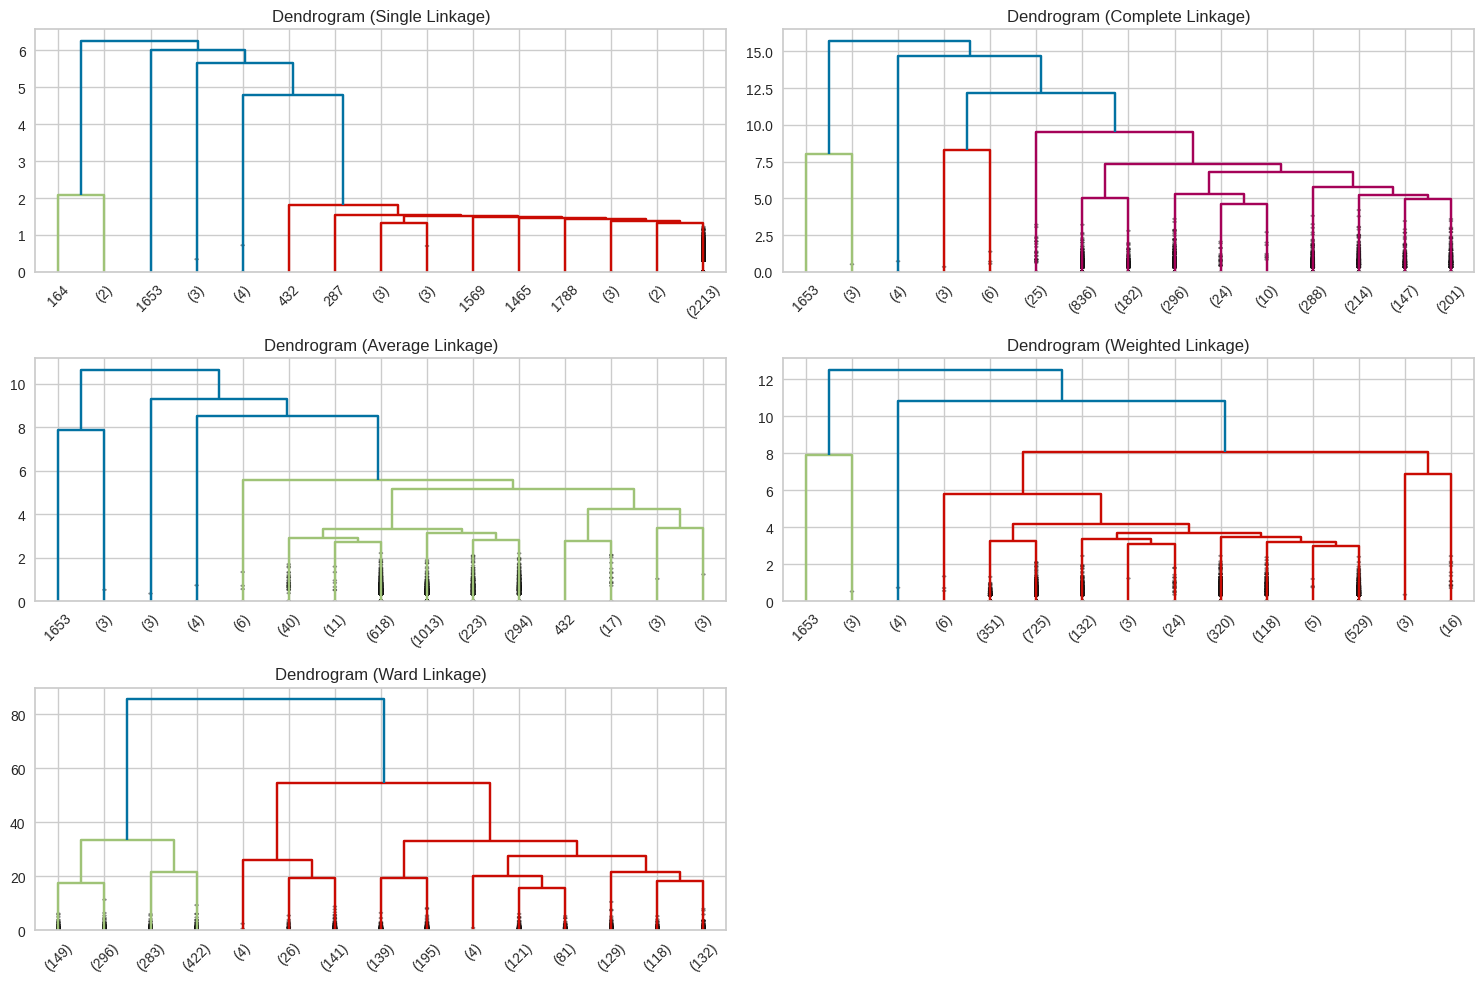

In [30]:
# prompt: plot the dendogram for every linkage method with "Euclidean" distance only. What should be the appropriate linkage according to the plot?

plt.figure(figsize=(15, 10))

for i, method in enumerate(['single', 'complete', 'average', 'weighted', 'ward']):
    plt.subplot(3, 2, i + 1)
    Z = linkage(hc_data, method=method, metric="euclidean")
    dendrogram(Z, truncate_mode='lastp', p=15, leaf_rotation=45, leaf_font_size=10, show_contracted=True)
    plt.title(f"Dendrogram ({method.capitalize()} Linkage)")
plt.tight_layout()
plt.show()

##### **Observations:** Single linkage is the most appropriate.

#### **Question 12:** Check the silhoutte score for the hierchial clustering. What should be the appropriate number of clusters according to this plot?

Silhouette score for 2 clusters with ward linkage: 0.3487
Silhouette score for 2 clusters with complete linkage: 0.7324
Silhouette score for 2 clusters with average linkage: 0.7324
Silhouette score for 2 clusters with single linkage: 0.7415
Silhouette score for 3 clusters with ward linkage: 0.3780
Silhouette score for 3 clusters with complete linkage: 0.6687
Silhouette score for 3 clusters with average linkage: 0.6879
Silhouette score for 3 clusters with single linkage: 0.6967
Silhouette score for 4 clusters with ward linkage: 0.2479
Silhouette score for 4 clusters with complete linkage: 0.5839
Silhouette score for 4 clusters with average linkage: 0.6580
Silhouette score for 4 clusters with single linkage: 0.6693
Silhouette score for 5 clusters with ward linkage: 0.2121
Silhouette score for 5 clusters with complete linkage: 0.4493
Silhouette score for 5 clusters with average linkage: 0.6524
Silhouette score for 5 clusters with single linkage: 0.6524
Silhouette score for 6 clusters with

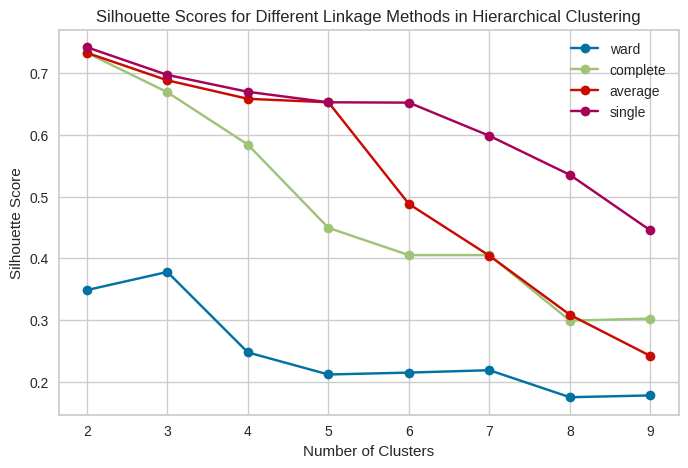

In [31]:
sil_score_hc = {}  # Initialize as a dictionary to store scores for each (n_clusters, linkage) combination
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    for linkage in ['ward', 'complete', 'average', 'single']:
        if linkage == 'ward':
            agg_clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)  # Ward doesn't use metric
        else:
            agg_clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric='euclidean')
        preds = agg_clusterer.fit_predict(hc_data)                # Fit on hc_data, not feature
        score = silhouette_score(hc_data, preds)               # Calculate score using preds
        sil_score_hc[(n_clusters, linkage)] = score  # Store score in the dictionary
        print(f"Silhouette score for {n_clusters} clusters with {linkage} linkage: {score:.4f}")

# Plot silhouette scores for different linkages
plt.figure(figsize=(8, 5))
for linkage in ['ward', 'complete', 'average', 'single']:
    # Access scores from the dictionary using (n, linkage) as keys
    scores = [sil_score_hc[(n, linkage)] for n in range(2, 10)]
    plt.plot(range(2, 10), scores, marker='o', label=linkage)

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different Linkage Methods in Hierarchical Clustering")
plt.legend()
plt.grid(True)
plt.show()

##### **Observations:**

#### **Question 13**: Fit the Hierarchial clustering model with the appropriate parameters finalized above. How much time does it take to fit the model?

In [32]:
%%time
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='average', metric='euclidean')
agg_clustering.fit(hc_data)

CPU times: user 170 ms, sys: 2.07 ms, total: 172 ms
Wall time: 175 ms


AgglomerativeClustering(linkage='average', n_clusters=3)

##### **Observations:**

## **Cluster Profiling and Comparison**

### K-Means Clustering vs Hierarchical Clustering Comparison

#### **Question 14**: Perform and compare Cluster profiling on both algorithms using boxplots. Based on the all the observaions Which one of them provides better clustering?

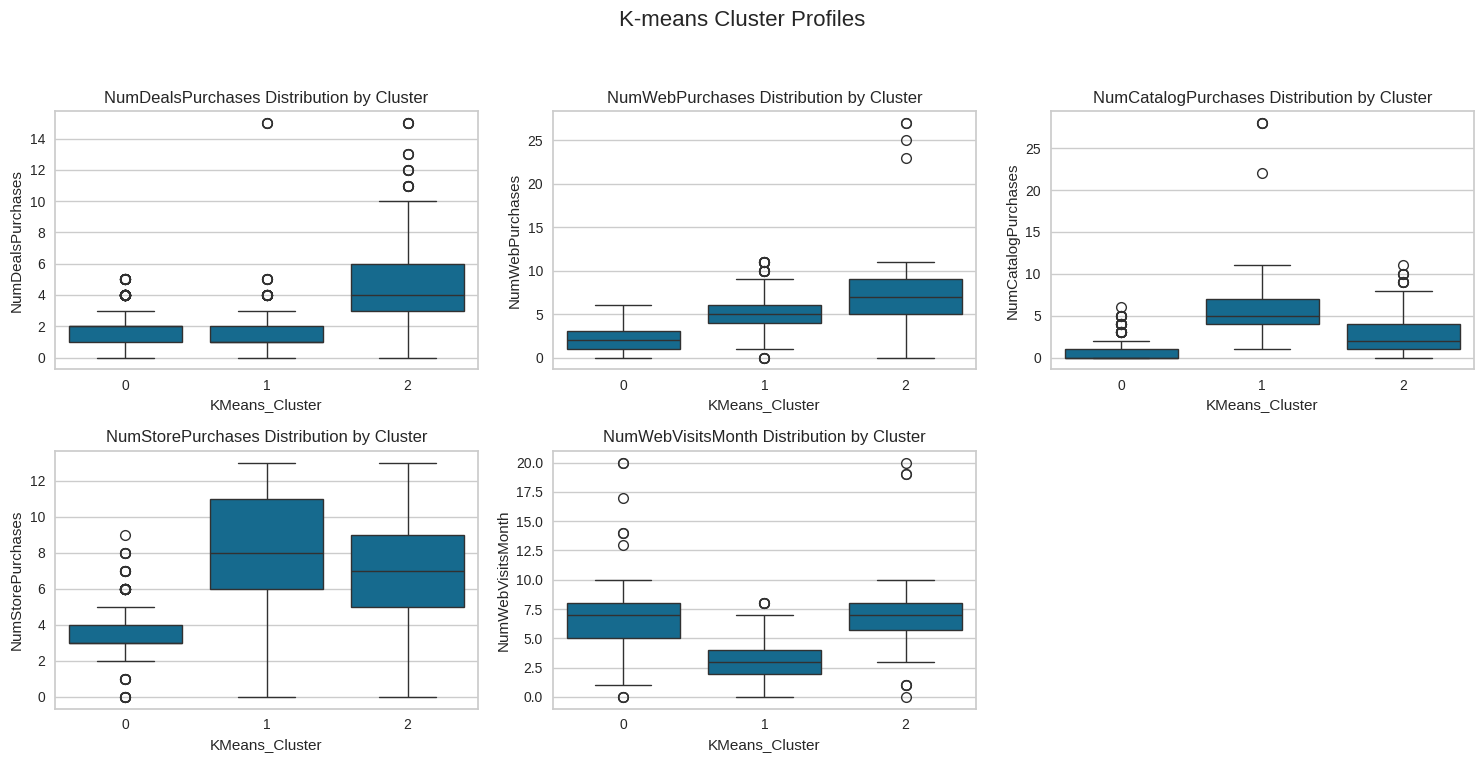

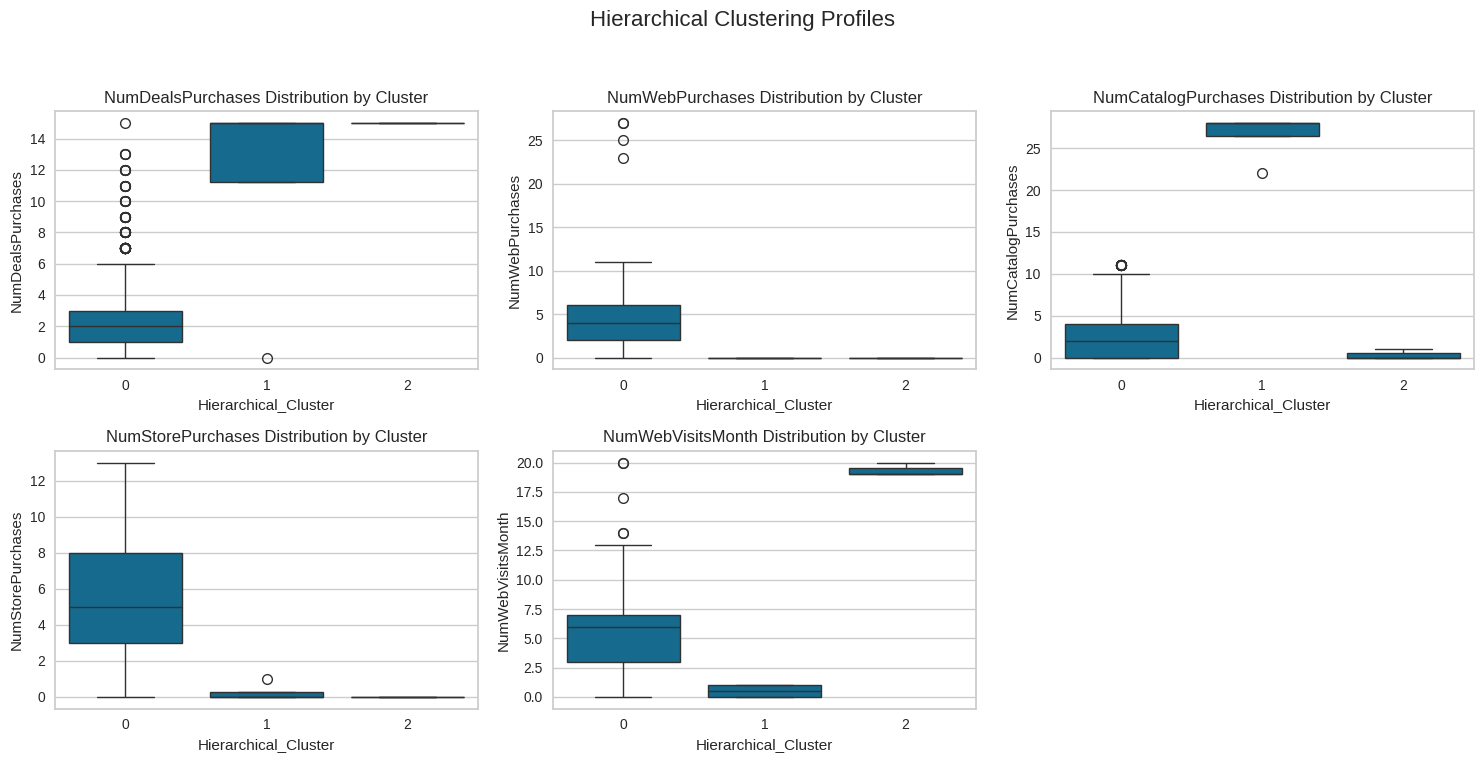

In [44]:
# Add cluster labels to the dataframes
data = data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
data['KMeans_Cluster'] = kmeans.labels_
data['Hierarchical_Cluster'] = agg_clustering.fit_predict(hc_data)

# Function to create boxplots for each cluster
def plot_cluster_profiles(data, title, cluster_col):
    num_features = len(data.columns[:-1])
    num_rows = int(np.ceil(num_features / 3))
    num_cols = 3

    plt.figure(figsize=(15, num_rows * 4))
    for i, col in enumerate(data.columns[:-2]):
        plt.subplot(num_rows, num_cols, i + 1 )
        sns.boxplot(x=cluster_col, y=col, data=data)
        plt.title(f'{col} Distribution by Cluster')
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Plot cluster profiles for K-means
plot_cluster_profiles(data, 'K-means Cluster Profiles', 'KMeans_Cluster') # pass 'KMeans_Cluster' as cluster_col

# Plot cluster profiles for Hierarchical Clustering
plot_cluster_profiles(data, 'Hierarchical Clustering Profiles', 'Hierarchical_Cluster') # pass 'Hierarchical_Cluster' as cluster_col



##### **Observations:**

#### **Question 15**: Perform Cluster profiling on the data with the appropriate algorithm determined above using a barplot. What observations can be derived for each cluster from this plot?

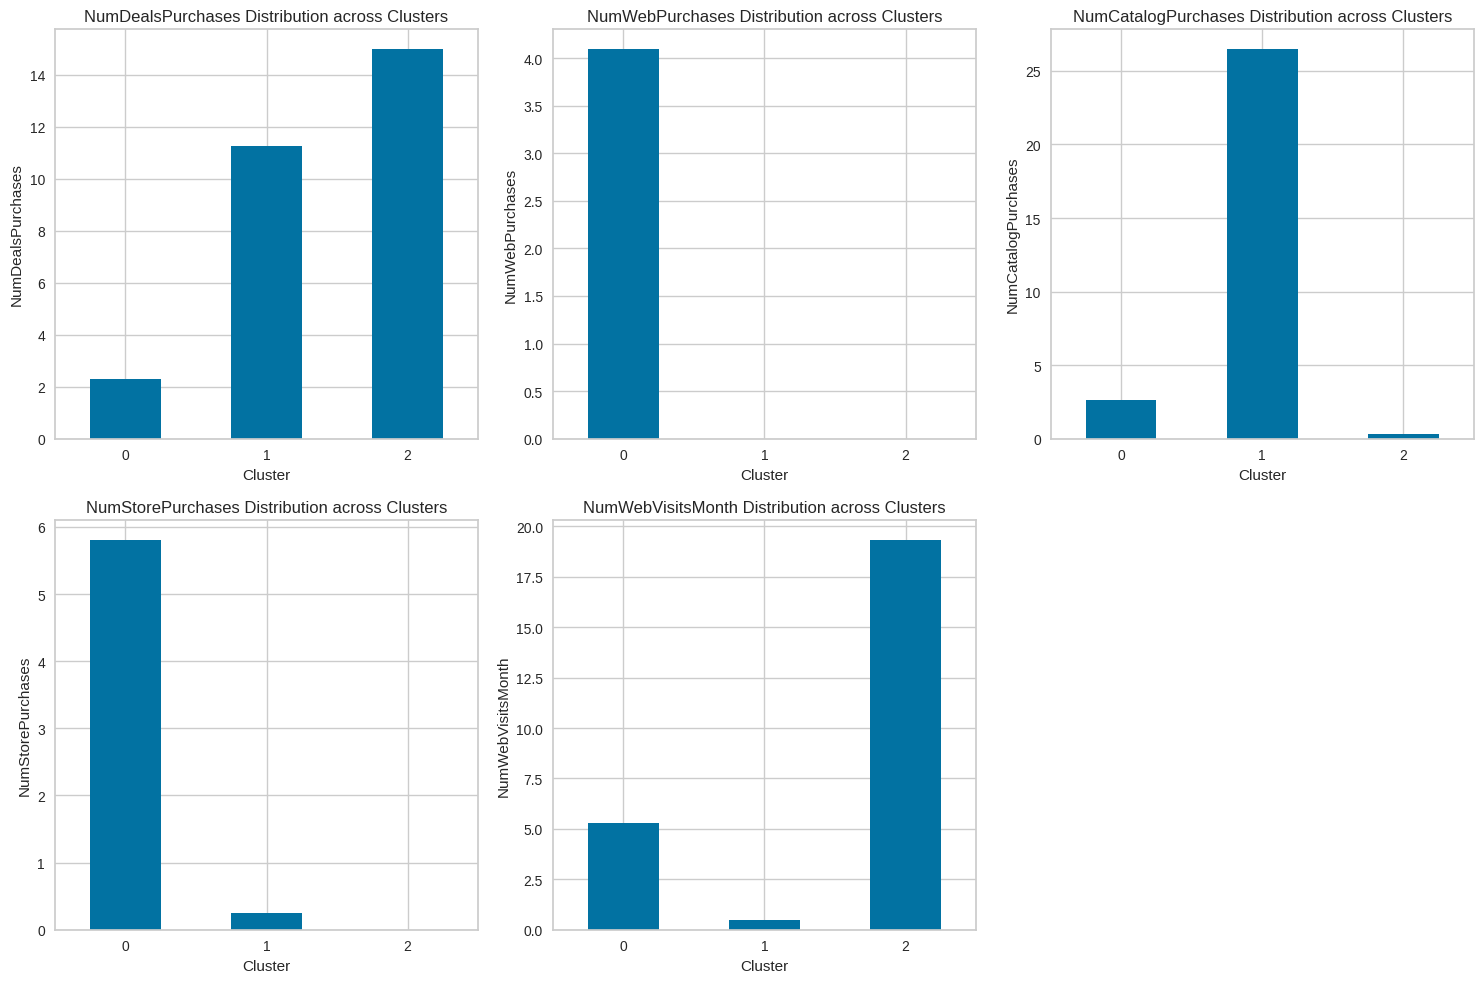

In [46]:
# Features to compare clusters
features_to_compare = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                      'NumStorePurchases', 'NumWebVisitsMonth']

# Calculate mean values for each feature within each cluster
cluster_means = data.groupby('Hierarchical_Cluster')[features_to_compare].mean()

# Plotting barplot for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_compare):
    plt.subplot(2, 3, i + 1)
    cluster_means[feature].plot(kind='bar')
    plt.title(f'{feature} Distribution across Clusters')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


##### **Observations:**
- Cluster 0: This cluster shows a relatively high average number of store purchases and relatively low number of web purchases. This may indicate a preference for in-store shopping.
- Cluster 1: This cluster has a balanced distribution of purchases across different channels (store, web, catalog). They also have moderately high web visits.
- Cluster 2: This cluster tends to make more deals purchases and has a higher number of web visits.

## **Cluster Analysis: Observations & Recommendations**
### **1. Observations**
**Cluster 0:**

- High preference for in-store shopping with fewer web purchases.
- Indicates customers are more traditional and value physical retail interactions​.

**Cluster 1:**

- Balanced purchases across channels (store, web, catalog) with moderate web visits.
- Represents omnichannel shoppers who might respond well to integrated experiences​.

**Cluster 2:**

- High number of deal-based purchases and frequent web visits.
- Likely value discounts and convenience​.

### **2. Recommendations**
**Cluster 0**: Enhance Store Experience:

- Introduce loyalty programs for in-store purchases.
- Organize in-store events to strengthen customer engagement​.

**Cluster 1:** Build Omnichannel Engagement:

- Ensure seamless integration across shopping channels.
- Offer personalized recommendations that span store, web, and catalog​.

**Cluster 2:** Focus on Deals and Online Outreach:

- Design digital campaigns with exclusive deals and discounts.
- Utilize targeted marketing to highlight convenience and savings​.


###=> **Final Strategy**
1. Leverage cluster insights to design targeted strategies:
For Cluster 0, prioritize physical retail enhancements.
For Cluster 1, implement integrated omnichannel experiences.
For Cluster 2, maximize digital and deal-based outreach.
2. Use hierarchical clustering for better differentiation between customer groups.
3. Regularly evaluate customer preferences and update cluster definitions to align with evolving behaviors.

## **Business Recommedations**


- We have seen that 3 clusters are distinctly formed using both methodologies and the clusters are analogous to each other.
- Cluster 1 has premium customers with a high credit limit and more credit cards, indicating that they have more purchasing power. The customers in this group have a preference for online banking.
- Cluster 0 has customers who prefer to visit the bank for their banking needs than doing business online or over the phone. They have an average credit limit and a moderate number of credit cards.
- Cluster 2 has more overhead of customers calling in, and the bank may need to spend money on call centers.


Here are **5–7 actionable business recommendations** based on the cluster profiling:

---

### **1. Focus on Retaining High-Value Customers (Cluster 3)**
- **Offer Exclusive Loyalty Programs**: Provide tailored loyalty benefits, early access to products, and exclusive discounts to maintain engagement and drive repeat purchases.
- **Upsell and Cross-Sell**: Introduce premium products or bundles targeting their high spending patterns across product categories like wines, gold products, and meats.
- **Personalized Campaigns**: Use their high response rate to create personalized campaigns highlighting products they prefer.

---

### **2. Activate Potential in Moderate-Spending Customers (Cluster 2)**
- **Incentivize Higher Engagement**: Offer targeted discounts or special offers to encourage increased spending and purchases across channels.
- **Educate About Products**: Provide content (emails, guides, or social media) showcasing the value and uniqueness of products they don’t purchase frequently.
- **Improve Campaign Effectiveness**: Refine campaign messaging based on their moderate response rate to increase acceptance.

---

### **3. Reengage Low-Value Customers (Cluster 1)**
- **Win-Back Campaigns**: Implement campaigns specifically aimed at bringing back inactive customers, such as offering steep discounts or limited-time offers.
- **Understand Barriers to Engagement**: Conduct surveys or collect feedback to identify reasons for their low purchases and disengagement.
- **Promote Entry-Level Products**: Introduce affordable or trial-sized products to ease them into higher spending.

---

### **4. Convert Browsers into Buyers (Cluster 0)**
- **Optimize Website Experience**: Since Cluster 0 has high website visits but low spending, improve website navigation, showcase popular products, and streamline the checkout process.
- **Targeted Digital Campaigns**: Retarget these users with ads or emails featuring products they browsed but didn’t purchase.
- **Offer Online-Exclusive Discounts**: Provide web-only discounts or promotions to convert visits into purchases.

---

### **5. Strengthen Digital and Multi-Channel Strategies**
- **Seamless Omni-Channel Experience**: Ensure a consistent shopping experience across all channels (web, catalog, and store) to encourage cross-channel engagement, especially for Clusters 2 and 3.
- **Digital Campaigns for All Clusters**: Focus on targeted digital campaigns, particularly for Clusters 0 and 2, as they have moderate to high online engagement.

---

### **6. Develop Campaigns to Boost Responses**
- Use the insights from Clusters 2 and 3 (which show higher response rates) to refine campaign targeting and messaging. Emulate successful strategies used for Cluster 3 to increase responses across other segments.

---

### **7. Leverage Product-Specific Insights**
- Promote popular categories (e.g., wines, gold products) to high-value clusters, while running introductory campaigns for less-engaged clusters to familiarize them with premium products.

---

By focusing on these strategies, the company can enhance engagement, increase revenue, and strengthen customer loyalty across all clusters.